# Importing Necessary Libraries

1. numpy and pandas for data handling
2. seaborns and matplotlib for data visulisation and analysis
3. Sklearn for machine learing tools 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')


# Reading Data 

### source : https://www.kaggle.com/datasets/rajanand/education-in-india

In [2]:
df=pd.read_csv('Edtech.csv')
df.head(10)

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209
5,2015-16,1,106,JAMMU & KASHMIR,ANANTNAG,1,12,523,96,1070144.0,...,17771,22,3498,2650,5862,152,60,22,1592,185
6,2015-16,1,107,JAMMU & KASHMIR,LEH (LADAKH),1,6,110,49,147104.0,...,1244,0,889,604,1059,45,9,17,473,0
7,2015-16,1,108,JAMMU & KASHMIR,KARGIL,1,7,134,54,143388.0,...,59,0,59,716,1469,69,26,3,220,99
8,2015-16,1,109,JAMMU & KASHMIR,DODA,1,10,388,80,409576.0,...,14641,2474,2272,2073,2354,165,17,36,766,36
9,2015-16,1,110,JAMMU & KASHMIR,UDHAMPUR,1,11,361,86,555357.0,...,18428,6844,2522,2256,3080,520,13,22,1151,6


# Data Explorartion ( Statistical Analysis)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
STATCD,680.0,17.292647,9.451743,1.0,9.00,18.0,24.00,36.0
DISTCD,680.0,1745.976471,944.257509,101.0,937.75,1823.5,2413.25,3610.0
DISTRICTS,680.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
BLOCKS,680.0,10.760294,9.585360,1.0,5.00,8.0,13.00,66.0
VILLAGES,680.0,874.614706,622.711657,6.0,390.75,785.5,1204.25,3963.0
...,...,...,...,...,...,...,...,...
TOTCLS3G,680.0,764.154412,1330.305834,0.0,68.00,249.5,887.75,16053.0
TOTCLS4G,680.0,898.879412,1425.313485,0.0,17.00,129.5,1383.00,8590.0
TOTCLS5G,680.0,391.352941,820.868908,0.0,17.00,70.5,462.00,8074.0
TOTCLS6G,680.0,717.679412,1194.616699,0.0,137.00,407.0,824.50,15458.0


In [4]:
df.corr()

,STATCD,DISTCD,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
STATCD,1.000000,0.999887,NaN,0.196317,0.017709,0.051105,0.184905,0.269162,0.031820,-0.177597,...,0.087266,-0.013080,0.280144,0.005339,0.206912,-0.090637,-0.202187,0.083613,0.064812,0.309357
DISTCD,0.999887,1.000000,NaN,0.196908,0.021437,0.052357,0.187356,0.267159,0.034843,-0.177353,...,0.088261,-0.011802,0.281108,0.009901,0.206558,-0.092164,-0.195391,0.083694,0.062637,0.308923
DISTRICTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCKS,0.196317,0.196908,NaN,1.000000,0.494598,0.648484,0.582107,0.012774,0.505860,-0.088741,...,0.583618,0.524491,0.153307,0.588963,0.264307,-0.000530,0.063479,0.324714,0.269623,0.688891
VILLAGES,0.017709,0.021437,NaN,0.494598,1.000000,0.641216,0.564316,-0.191849,0.617782,0.044621,...,0.535451,0.528404,0.246861,0.736806,0.308883,0.032873,0.429351,0.417884,0.089211,0.185836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOTCLS3G,-0.090637,-0.092164,NaN,-0.000530,0.032873,0.315639,0.266287,0.372766,0.221581,0.066285,...,-0.054505,0.007796,-0.136352,0.045220,0.347082,1.000000,-0.107934,0.130935,0.591447,-0.040170
TOTCLS4G,-0.202187,-0.195391,NaN,0.063479,0.429351,0.039355,0.236574,-0.128941,0.329238,0.085887,...,0.203439,0.270672,0.105204,0.671514,-0.268968,-0.107934,1.000000,0.139367,-0.216898,-0.113360
TOTCLS5G,0.083613,0.083694,NaN,0.324714,0.417884,0.248733,0.552155,0.167903,0.429163,-0.093743,...,0.572638,0.660514,0.035356,0.615454,-0.066852,0.130935,0.139367,1.000000,-0.009655,0.272670
TOTCLS6G,0.064812,0.062637,NaN,0.269623,0.089211,0.356001,0.308956,0.289293,0.254440,0.086680,...,-0.028365,-0.003935,-0.050048,0.023140,0.429519,0.591447,-0.216898,-0.009655,1.000000,0.227311


In [5]:
df.isnull().sum()

AC_YEAR     0
STATCD      0
DISTCD      0
STATNAME    0
DISTNAME    0
           ..
TOTCLS3G    0
TOTCLS4G    0
TOTCLS5G    0
TOTCLS6G    0
TOTCLS7G    0
Length: 819, dtype: int64

In [6]:
df.columns

Index(['AC_YEAR', 'STATCD', 'DISTCD', 'STATNAME', 'DISTNAME', 'DISTRICTS',
       'BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT',
       ...
       'UUNI_ALL', 'UUNI_SC', 'UUNI_ST', 'TOTCLS1G', 'TOTCLS2G', 'TOTCLS3G',
       'TOTCLS4G', 'TOTCLS5G', 'TOTCLS6G', 'TOTCLS7G'],
      dtype='object', length=819)

In [7]:
cols=df.columns
for col in cols:
    print(col)

AC_YEAR
STATCD
DISTCD
STATNAME
DISTNAME
DISTRICTS
BLOCKS
VILLAGES
CLUSTERS
TOTPOPULAT
P_URB_POP
POPULATION_0_6
GROWTHRATE
SEXRATIO
P_SC_POP
P_ST_POP
OVERALL_LI
FEMALE_LIT
MALE_LIT
AREA_SQKM
TOT_6_10_15
TOT_11_13_15
SCH1
SCH2
SCH3
SCH4
SCH5
SCH6
SCH7
SCH9
SCHTOT
SCH1G
SCH2G
SCH3G
SCH4G
SCH5G
SCH6G
SCH7G
SCH9G
SCHTOTG
SCH1P
SCH2P
SCH3P
SCH4P
SCH5P
SCH6P
SCH7P
SCH9P
SCHTOTP
SCH1M
SCH2M
SCH3M
SCH4M
SCH5M
SCH6M
SCH7M
SCH9M
SCHTOTM
SCH1GR
SCH2GR
SCH3GR
SCH4GR
SCH5GR
SCH6GR
SCH7GR
SCH9GR
SCHTOTGR
SCH1GA
SCH2GA
SCH3GA
SCH4GA
SCH5GA
SCH6GA
SCH7GA
SCH9GA
SCHTOTGA
SCH1PR
SCH2PR
SCH3PR
SCH4PR
SCH5PR
SCH6PR
SCH7PR
SCH9PR
SCHTOTPR
SCHBOY1
SCHBOY2
SCHBOY3
SCHBOY4
SCHBOY5
SCHBOY6
SCHBOY7
SCHBOY9
SCHBOYTOT
SCHGIR1
SCHGIR2
SCHGIR3
SCHGIR4
SCHGIR5
SCHGIR6
SCHGIR7
SCHGIR9
SCHGIRTOT
ENR1
ENR2
ENR3
ENR4
ENR5
ENR6
ENR7
ENR9
ENRTOT
ENR1G
ENR2G
ENR3G
ENR4G
ENR5G
ENR6G
ENR7G
ENR9G
ENRTOTG
ENR1P
ENR2P
ENR3P
ENR4P
ENR5P
ENR6P
ENR7P
ENR9P
ENRTOTP
ENR1M
ENR2M
ENR3M
ENR4M
ENR5M
ENR6M
ENR7M
ENR9M
ENRTOTM
ENR1GR
ENR2G

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Columns: 819 entries, AC_YEAR to TOTCLS7G
dtypes: float64(13), int64(803), object(3)
memory usage: 4.2+ MB


# Data Visualisation

In [9]:
a=df.iloc[:100,0:19]
a

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,11.33,197001.90,34.62,843.0,0.12,8.08,66.92,54.79,77.10
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,17.19,161871.18,20.34,873.0,0.15,3.74,66.93,55.01,77.35
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,98.73,155798.45,23.56,879.0,0.09,0.72,71.21,63.47,77.95
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,11.74,150755.79,21.18,883.0,0.05,3.17,57.98,46.60,68.56
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,13.80,97651.28,29.18,913.0,0.07,4.03,65.00,53.81,75.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-16,7,705,DELHI,NEW DELHI,1,7,29,7,133713.0,-25.35,11552.80,-25.35,811.0,23.41,0.00,89.38,84.83,93.04
96,2015-16,7,706,DELHI,CENTRAL DELHI,1,8,68,8,578671.0,-10.48,60413.25,-10.48,892.0,24.59,0.00,85.25,82.60,87.60
97,2015-16,7,707,DELHI,WEST DELHI,1,7,182,7,2531583.0,23.65,282777.82,18.91,876.0,14.80,0.00,87.12,82.50,91.17
98,2015-16,7,708,DELHI,SOUTH WEST DELHI,1,9,153,9,2292363.0,40.44,262704.80,30.62,836.0,13.89,0.00,88.81,83.07,93.62


In [10]:
a.drop(['CLUSTERS'],axis=1)

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,875564.0,11.33,197001.90,34.62,843.0,0.12,8.08,66.92,54.79,77.10
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,1015503.0,17.19,161871.18,20.34,873.0,0.15,3.74,66.93,55.01,77.35
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,1269751.0,98.73,155798.45,23.56,879.0,0.09,0.72,71.21,63.47,77.95
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,735753.0,11.74,150755.79,21.18,883.0,0.05,3.17,57.98,46.60,68.56
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,570060.0,13.80,97651.28,29.18,913.0,0.07,4.03,65.00,53.81,75.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-16,7,705,DELHI,NEW DELHI,1,7,29,133713.0,-25.35,11552.80,-25.35,811.0,23.41,0.00,89.38,84.83,93.04
96,2015-16,7,706,DELHI,CENTRAL DELHI,1,8,68,578671.0,-10.48,60413.25,-10.48,892.0,24.59,0.00,85.25,82.60,87.60
97,2015-16,7,707,DELHI,WEST DELHI,1,7,182,2531583.0,23.65,282777.82,18.91,876.0,14.80,0.00,87.12,82.50,91.17
98,2015-16,7,708,DELHI,SOUTH WEST DELHI,1,9,153,2292363.0,40.44,262704.80,30.62,836.0,13.89,0.00,88.81,83.07,93.62


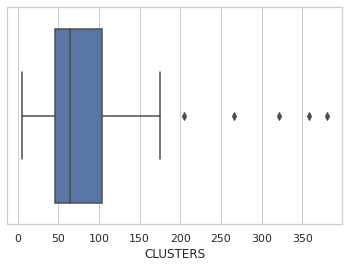

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=a['CLUSTERS'])

<AxesSubplot:xlabel='TOTPOPULAT', ylabel='GROWTHRATE'>

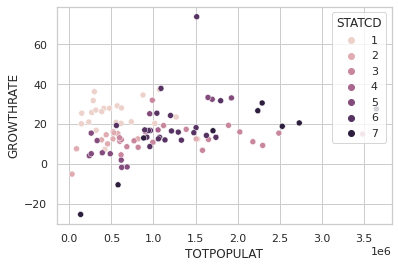

In [12]:
sns.scatterplot(x=a['TOTPOPULAT'],y=a['GROWTHRATE'],hue=a['STATCD'],data=a)

In [13]:
b=df.iloc[101:200,0:13]
b

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE
101,2015-16,8,802,RAJASTHAN,HANUMANGARH,1,7,994,284,1779650.0,19.71,232956.19,17.24
102,2015-16,8,803,RAJASTHAN,BIKANER,1,7,866,293,2367745.0,33.95,394466.32,41.42
103,2015-16,8,804,RAJASTHAN,CHURU,1,7,1053,289,2041172.0,28.24,313932.25,6.10
104,2015-16,8,805,RAJASTHAN,JHUNJHUNUN,1,8,1061,340,2139658.0,22.91,285430.38,11.81
105,2015-16,8,806,RAJASTHAN,ALWAR,1,14,1994,508,3671999.0,17.82,580543.04,22.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2015-16,9,963,UTTAR PRADESH,BALLIA,1,18,1651,178,3223642.0,9.43,448730.97,16.73
196,2015-16,9,964,UTTAR PRADESH,JAUNPUR,1,22,2355,260,4476072.0,7.45,643211.55,14.43
197,2015-16,9,965,UTTAR PRADESH,GHAZIPUR,1,17,1675,204,3622727.0,7.56,538699.50,19.26
198,2015-16,9,966,UTTAR PRADESH,CHANDAULI,1,10,1189,128,1952713.0,12.55,304232.69,18.83


<AxesSubplot:xlabel='TOTPOPULAT', ylabel='GROWTHRATE'>

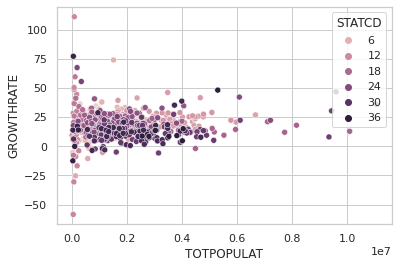

In [14]:
sns.scatterplot(x=df['TOTPOPULAT'],y=df['GROWTHRATE'],hue=df['STATCD'],data=df)

<Figure size 2160x2160 with 0 Axes>

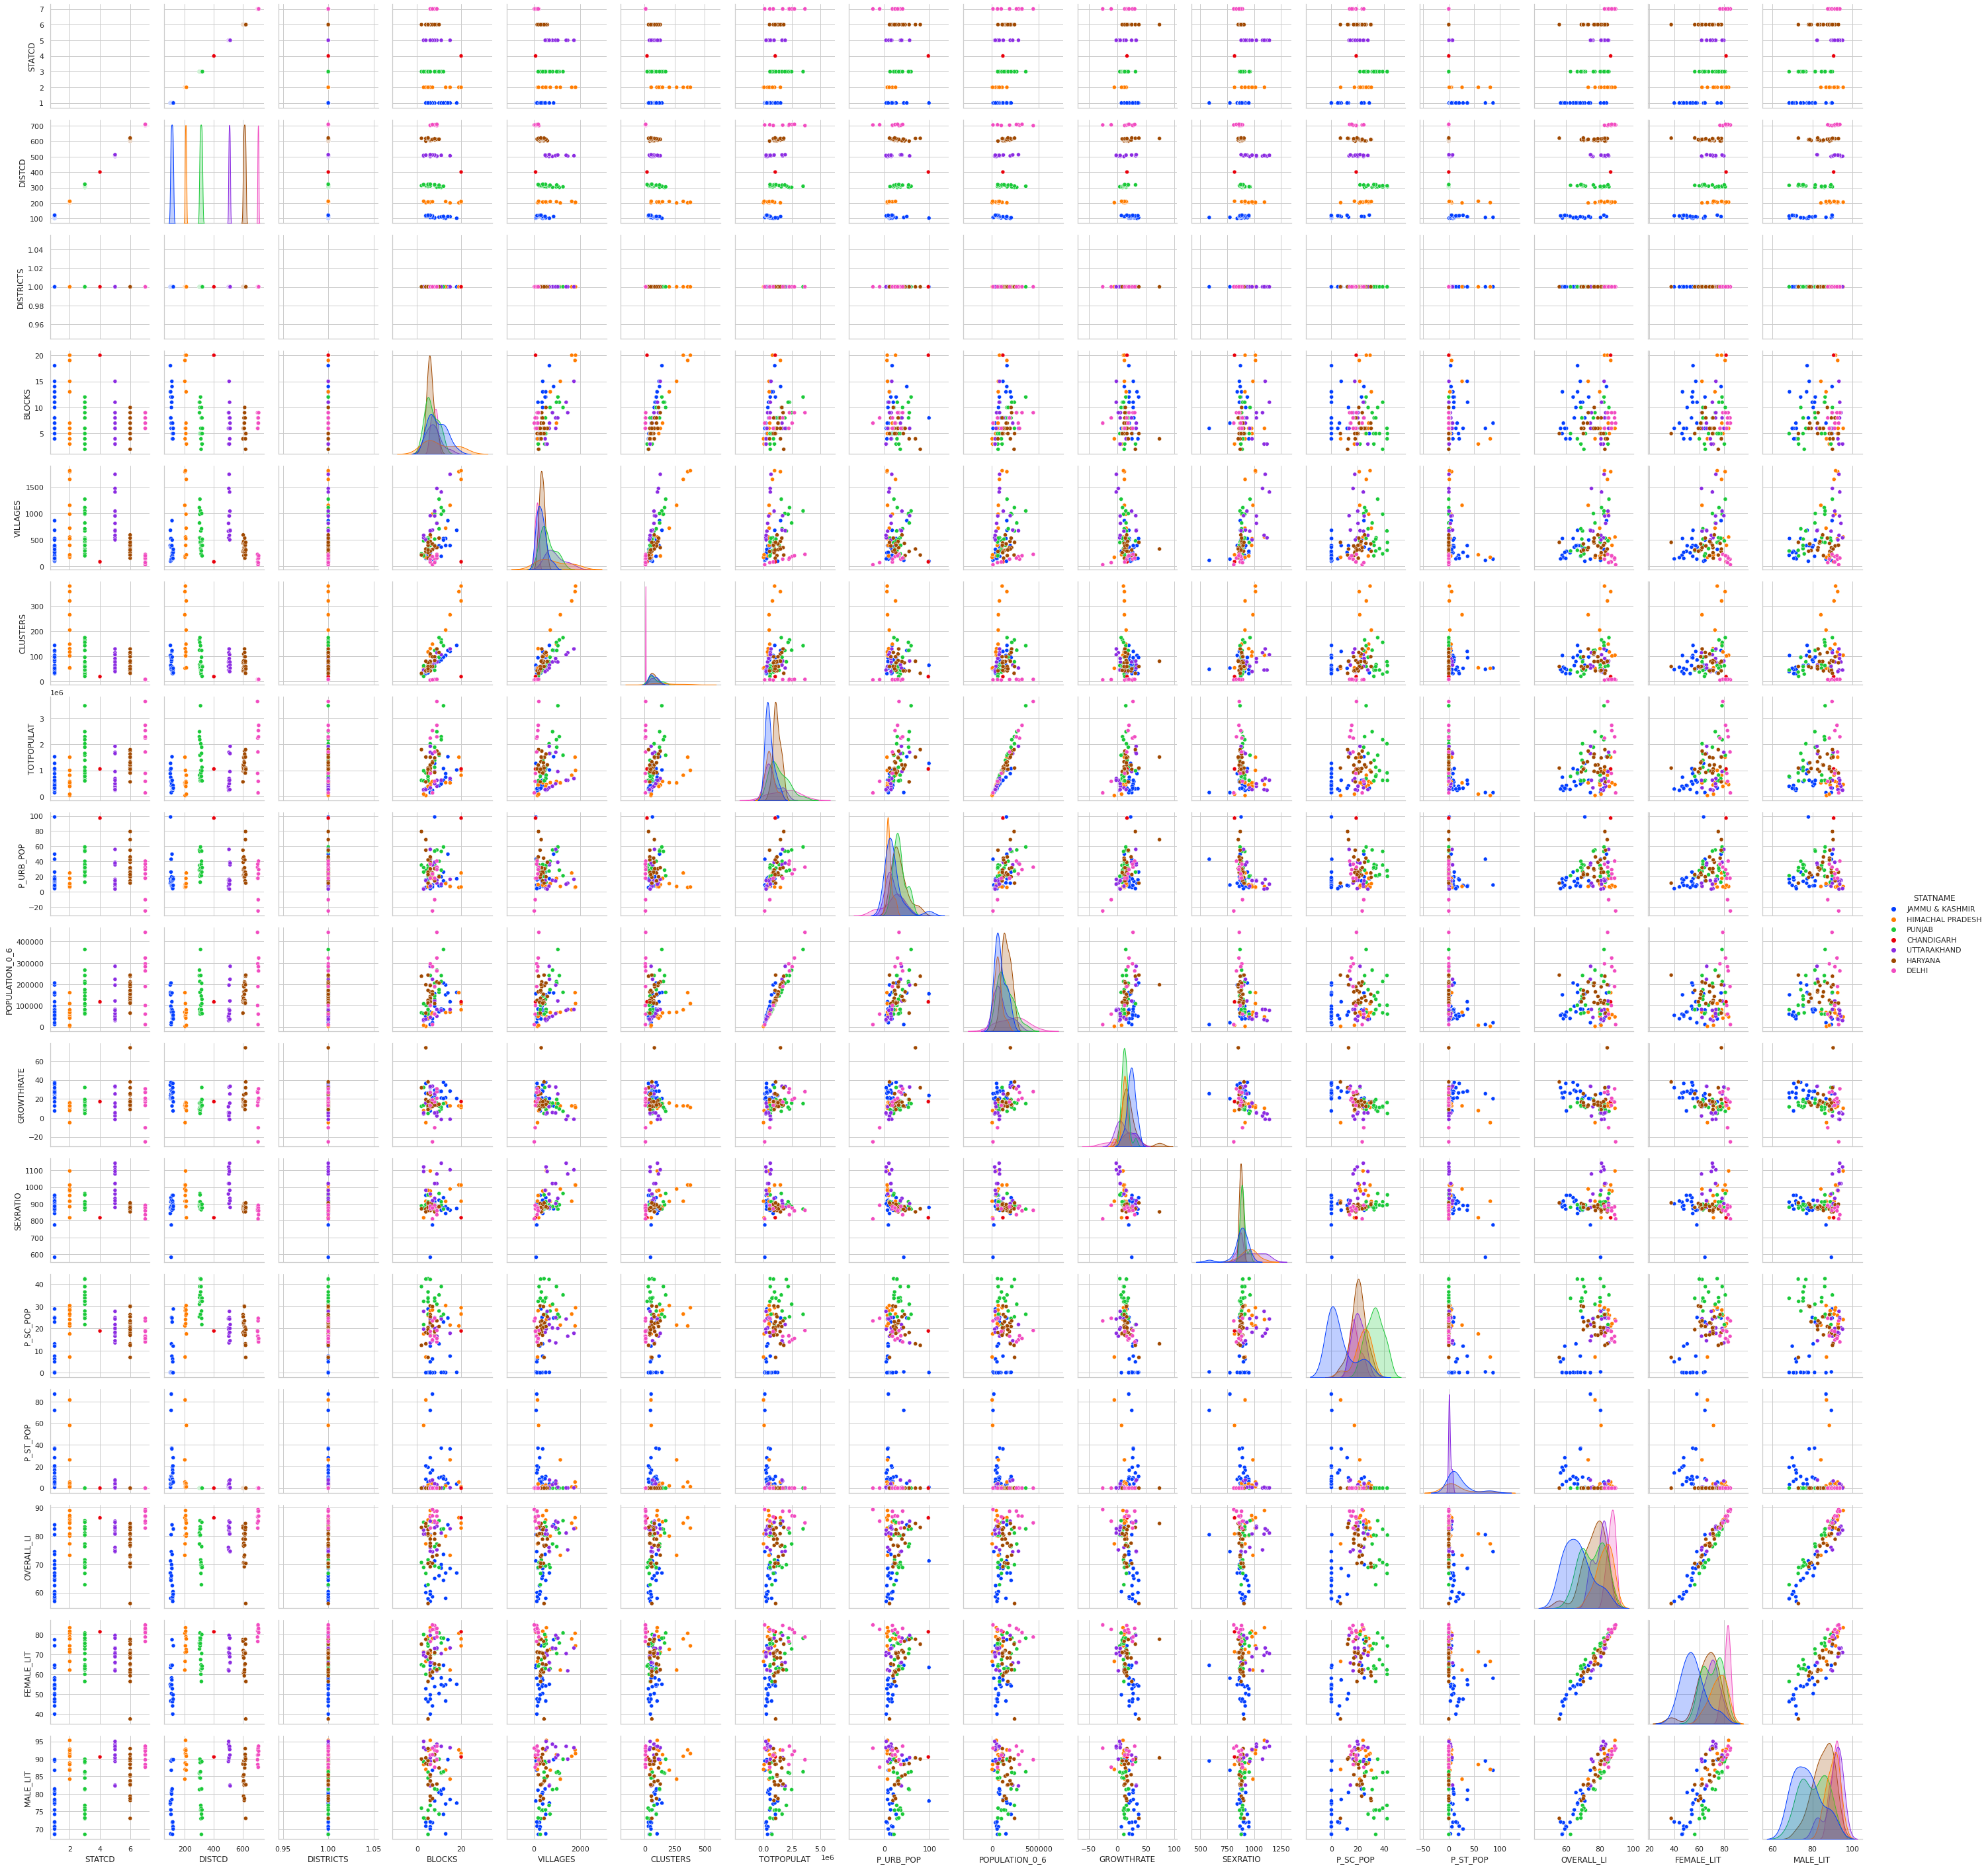

In [15]:
plt.figure(figsize=(30,30))
sns.pairplot(a,hue="STATNAME",palette="bright")

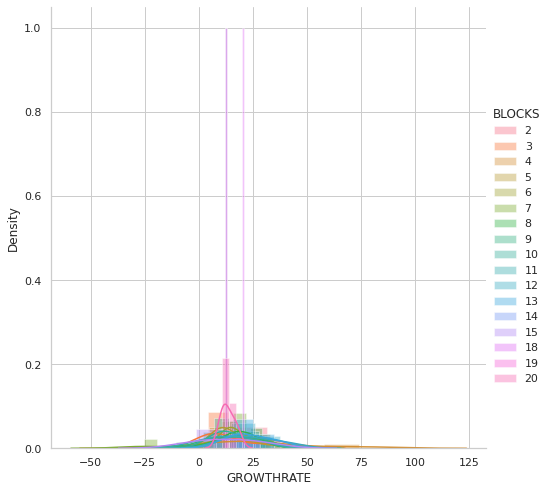

In [16]:
sns.FacetGrid(a, hue="BLOCKS", height=7) \
.map(sns.distplot, "GROWTHRATE") \
.add_legend()

In [17]:
x=a.drop(["AC_YEAR"],axis=1)
x

,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT
0,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,11.33,197001.90,34.62,843.0,0.12,8.08,66.92,54.79,77.10
1,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,17.19,161871.18,20.34,873.0,0.15,3.74,66.93,55.01,77.35
2,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,98.73,155798.45,23.56,879.0,0.09,0.72,71.21,63.47,77.95
3,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,11.74,150755.79,21.18,883.0,0.05,3.17,57.98,46.60,68.56
4,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,13.80,97651.28,29.18,913.0,0.07,4.03,65.00,53.81,75.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7,705,DELHI,NEW DELHI,1,7,29,7,133713.0,-25.35,11552.80,-25.35,811.0,23.41,0.00,89.38,84.83,93.04
96,7,706,DELHI,CENTRAL DELHI,1,8,68,8,578671.0,-10.48,60413.25,-10.48,892.0,24.59,0.00,85.25,82.60,87.60
97,7,707,DELHI,WEST DELHI,1,7,182,7,2531583.0,23.65,282777.82,18.91,876.0,14.80,0.00,87.12,82.50,91.17
98,7,708,DELHI,SOUTH WEST DELHI,1,9,153,9,2292363.0,40.44,262704.80,30.62,836.0,13.89,0.00,88.81,83.07,93.62


In [18]:
a=x[['TOTPOPULAT' ,'P_URB_POP', 'POPULATION_0_6' ,'GROWTHRATE','SEXRATIO','STATNAME','OVERALL_LI','FEMALE_LIT','MALE_LIT','P_SC_POP','P_ST_POP']]
b=df[['SCH1G','SCH2G','SCH3G','SCH4G','SCH5G','SCH6G','SCH7G','SCH9G',
      'SCH1P','SCH2P','SCH3P','SCH4P','SCH5P','SCH6P','SCH7P','SCH9P','SCHTOT','SCHTOTG']].iloc[:100]
x=pd.concat([a,b],axis=1)
x.reset_index(inplace = True)
x

,index,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,STATNAME,OVERALL_LI,FEMALE_LIT,MALE_LIT,...,SCH1P,SCH2P,SCH3P,SCH4P,SCH5P,SCH6P,SCH7P,SCH9P,SCHTOT,SCHTOTG
0,0,875564.0,11.33,197001.90,34.62,843.0,JAMMU & KASHMIR,66.92,54.79,77.10,...,127,121,1,0,0,35,0,0,2076,1792
1,1,1015503.0,17.19,161871.18,20.34,873.0,JAMMU & KASHMIR,66.93,55.01,77.35,...,107,186,8,0,0,80,0,0,2310,1929
2,2,1269751.0,98.73,155798.45,23.56,879.0,JAMMU & KASHMIR,71.21,63.47,77.95,...,55,208,35,0,0,198,0,0,985,489
3,3,735753.0,11.74,150755.79,21.18,883.0,JAMMU & KASHMIR,57.98,46.60,68.56,...,56,114,9,0,0,58,0,0,1468,1229
4,4,570060.0,13.80,97651.28,29.18,913.0,JAMMU & KASHMIR,65.00,53.81,75.41,...,35,106,4,0,0,71,0,0,1028,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,133713.0,-25.35,11552.80,-25.35,811.0,DELHI,89.38,84.83,93.04,...,7,1,24,1,2,4,0,0,95,56
96,96,578671.0,-10.48,60413.25,-10.48,892.0,DELHI,85.25,82.60,87.60,...,29,5,38,2,29,6,5,0,241,127
97,97,2531583.0,23.65,282777.82,18.91,876.0,DELHI,87.12,82.50,91.17,...,135,119,116,1,8,57,6,0,808,366
98,98,2292363.0,40.44,262704.80,30.62,836.0,DELHI,88.81,83.07,93.62,...,112,115,128,1,2,45,0,0,742,339


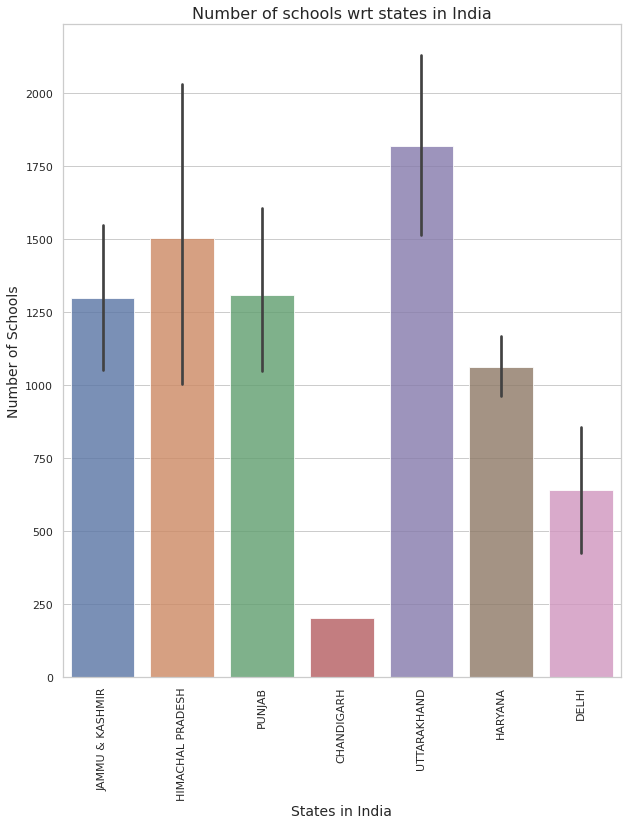

In [19]:
plt.figure(figsize=(10,12))
sns.barplot( x['STATNAME'],x['SCHTOT'],alpha=0.8)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Schools', fontsize=14)
plt.xlabel('States in India', fontsize=14)
plt.title("Number of schools wrt states in India", fontsize=16)
plt.show()

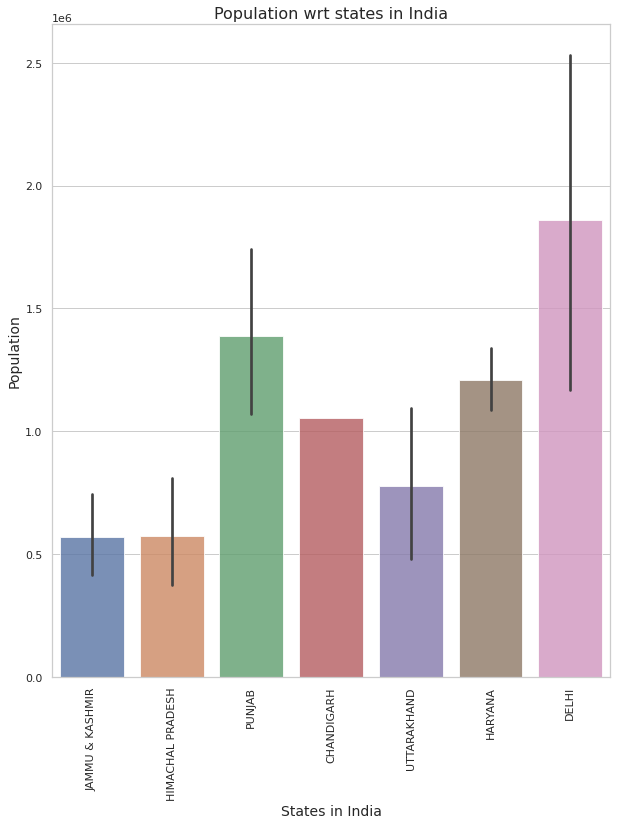

In [20]:
plt.figure(figsize=(10,12))
sns.barplot( x['STATNAME'],x['TOTPOPULAT'], alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('States in India', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.title("Population wrt states in India", fontsize=16)
plt.show()

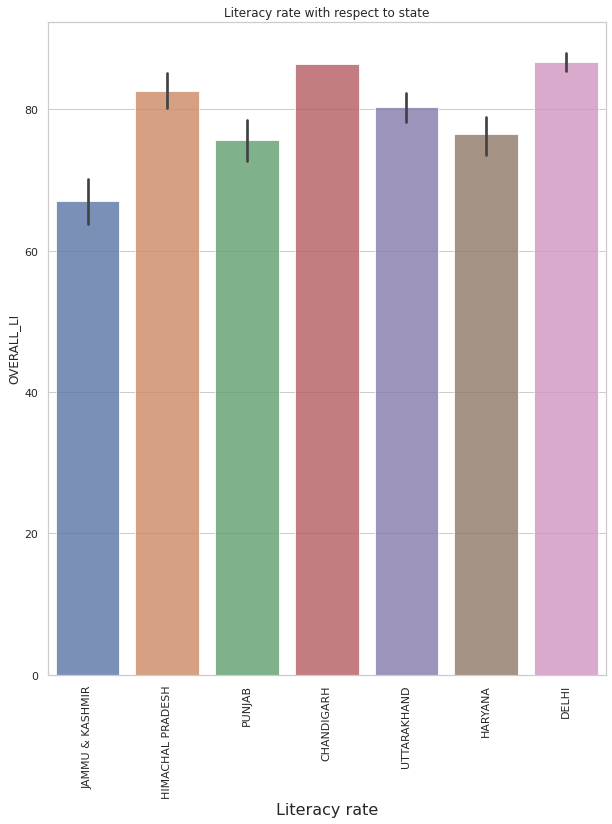

In [21]:
plt.figure(figsize=(10,12))
sns.barplot( x['STATNAME'],x['OVERALL_LI'],alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Literacy rate", fontsize=16)
plt.title('Literacy rate with respect to state')
plt.show()


# Data Cleaning And Preprocessing

In [22]:
def MakeDF(n):
    return pd.DataFrame(n)
govsch=pd.concat([MakeDF(x['SCH1G']),MakeDF(x['SCH2G']),MakeDF(x['SCH3G']),
          MakeDF(x['SCH4G']),MakeDF(x['SCH5G']),MakeDF(x['SCH6G']),
          MakeDF(x['SCH7G']),MakeDF(x['SCH9G'])],axis=1)
pvsch=pd.concat([MakeDF(x['SCH1P']),MakeDF(x['SCH2P']),MakeDF(x['SCH3P']),
          MakeDF(x['SCH4P']),MakeDF(x['SCH5P']),MakeDF(x['SCH6P']),
          MakeDF(x['SCH7P']),MakeDF(x['SCH9P'])],axis=1)

In [23]:

x=x.dropna()
print(x.isnull().sum())
x.shape

index             0
TOTPOPULAT        0
P_URB_POP         0
POPULATION_0_6    0
GROWTHRATE        0
SEXRATIO          0
STATNAME          0
OVERALL_LI        0
FEMALE_LIT        0
MALE_LIT          0
P_SC_POP          0
P_ST_POP          0
SCH1G             0
SCH2G             0
SCH3G             0
SCH4G             0
SCH5G             0
SCH6G             0
SCH7G             0
SCH9G             0
SCH1P             0
SCH2P             0
SCH3P             0
SCH4P             0
SCH5P             0
SCH6P             0
SCH7P             0
SCH9P             0
SCHTOT            0
SCHTOTG           0
dtype: int64


(96, 30)

In [24]:
x

,index,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,STATNAME,OVERALL_LI,FEMALE_LIT,MALE_LIT,...,SCH1P,SCH2P,SCH3P,SCH4P,SCH5P,SCH6P,SCH7P,SCH9P,SCHTOT,SCHTOTG
0,0,875564.0,11.33,197001.90,34.62,843.0,JAMMU & KASHMIR,66.92,54.79,77.10,...,127,121,1,0,0,35,0,0,2076,1792
1,1,1015503.0,17.19,161871.18,20.34,873.0,JAMMU & KASHMIR,66.93,55.01,77.35,...,107,186,8,0,0,80,0,0,2310,1929
2,2,1269751.0,98.73,155798.45,23.56,879.0,JAMMU & KASHMIR,71.21,63.47,77.95,...,55,208,35,0,0,198,0,0,985,489
3,3,735753.0,11.74,150755.79,21.18,883.0,JAMMU & KASHMIR,57.98,46.60,68.56,...,56,114,9,0,0,58,0,0,1468,1229
4,4,570060.0,13.80,97651.28,29.18,913.0,JAMMU & KASHMIR,65.00,53.81,75.41,...,35,106,4,0,0,71,0,0,1028,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,133713.0,-25.35,11552.80,-25.35,811.0,DELHI,89.38,84.83,93.04,...,7,1,24,1,2,4,0,0,95,56
96,96,578671.0,-10.48,60413.25,-10.48,892.0,DELHI,85.25,82.60,87.60,...,29,5,38,2,29,6,5,0,241,127
97,97,2531583.0,23.65,282777.82,18.91,876.0,DELHI,87.12,82.50,91.17,...,135,119,116,1,8,57,6,0,808,366
98,98,2292363.0,40.44,262704.80,30.62,836.0,DELHI,88.81,83.07,93.62,...,112,115,128,1,2,45,0,0,742,339


2022-03-29 18:36:18.270519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 18:36:18.270563: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-29 18:36:19.968364: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-29 18:36:19.968403: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-29 18:36:19.968423: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aniruddh-VirtualBox): /proc/driver/nvidia/version does not exist
2022-03-29 18:36:19.968686: I tensorflow/core/platform/cp

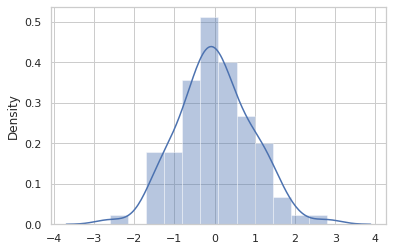

In [25]:
import tensorflow as tf
income=tf.random.normal((10,10),mean=0,stddev=1)
sns.distplot(income)
plt.show()

In [26]:
income.numpy().shape

(10, 10)

In [27]:
income=income.numpy().reshape(100,1)

In [28]:
scaler=MinMaxScaler()
income=scaler.fit_transform(income)
income.shape


(100, 1)

In [29]:
OVERALL_LI=x['OVERALL_LI']
df=pd.DataFrame(OVERALL_LI).iloc[:96,:]
df.shape

(96, 1)

In [30]:

scaler=MinMaxScaler()
try:
    scaler.fit([df])

except:
    scaler.fit(df) 
    
try:
    df=scaler.transform([df])
    
except:
    df=scaler.transform(df)
    
df=df.reshape(96,)
print(df.shape)
print(x['OVERALL_LI'].shape)
x['OVERALL_LI'].iloc[:96]=df
x=x.iloc[:96]
print(x['OVERALL_LI'].shape)

(96,)
(96,)
(96,)


In [31]:
x.shape

(96, 30)

In [32]:
x['income']=pd.DataFrame(income)[0:96]

In [33]:
x['income']=x['income'].dropna()

In [34]:
x['income']

0     0.336675
1     0.379020
2     0.478060
3     0.373996
4     0.540900
        ...   
95    0.291943
96         NaN
97         NaN
98         NaN
99         NaN
Name: income, Length: 96, dtype: float32

In [35]:
x['income'].shape

(96,)

In [37]:
x=x.dropna()

In [38]:
x['income']

0     0.336675
1     0.379020
2     0.478060
3     0.373996
4     0.540900
        ...   
91    0.280757
92    0.486316
93    0.754084
94    0.345673
95    0.291943
Name: income, Length: 92, dtype: float32

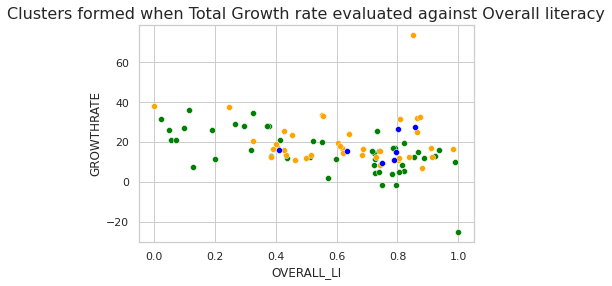

In [39]:
from sklearn.cluster import KMeans
k=x.drop(['STATNAME'],axis=1)
y_predicted = KMeans(n_clusters=3, random_state=0).fit_predict(k)
k['cluter']=y_predicted
import matplotlib.pyplot as plt

k1=k[k.cluter==0]

k2=k[k.cluter==1]

k3=k[k.cluter==2]



plt.title("Clusters formed when Total Growth rate evaluated against Overall literacy", fontsize=16)
sns.scatterplot(x=k1['OVERALL_LI'],y=k1['GROWTHRATE'],color='green')
sns.scatterplot(x=k2['OVERALL_LI'],y=k2['GROWTHRATE'],color='orange')
sns.scatterplot(x=k3['OVERALL_LI'],y=k3['GROWTHRATE'],color='blue')


plt.show()



In [40]:
x.loc[18,'TOTPOPULAT'] = x.loc[18,'TOTPOPULAT']/10

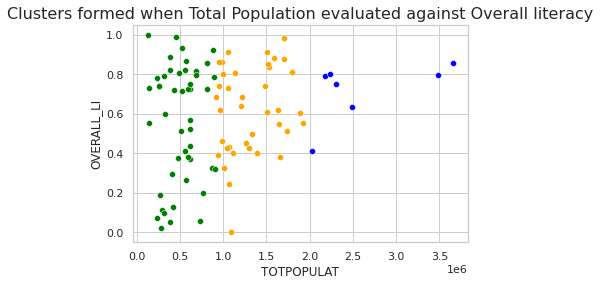

In [41]:
from sklearn.cluster import KMeans
y_predicted = KMeans(n_clusters=3, random_state=0).fit_predict(k)
k['cluter']=y_predicted
import matplotlib.pyplot as plt

k1=k[k.cluter==0]

k2=k[k.cluter==1]

k3=k[k.cluter==2]




plt.title("Clusters formed when Total Population evaluated against Overall literacy", fontsize=16)
sns.scatterplot(x=k1['TOTPOPULAT'],y=k1['OVERALL_LI'],color='green')
sns.scatterplot(x=k2['TOTPOPULAT'],y=k2['OVERALL_LI'],color='orange')
sns.scatterplot(x=k3['TOTPOPULAT'],y=k3['OVERALL_LI'],color='blue')


plt.show()



# Data Modeling

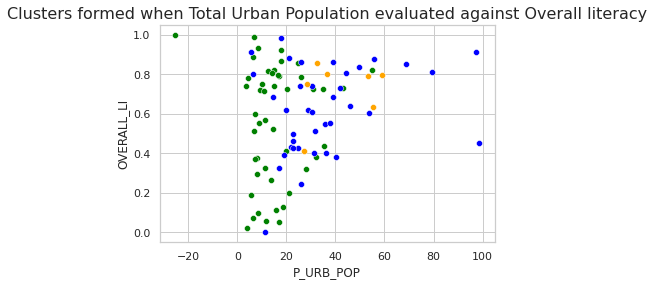

In [42]:
from sklearn.cluster import KMeans
y_predicted = KMeans(n_clusters=3, random_state=0).fit_predict(k)
k['cluter']=y_predicted
import matplotlib.pyplot as plt

k1=k[k.cluter==0]

k2=k[k.cluter==1]

k3=k[k.cluter==2]



plt.title("Clusters formed when Total Urban Population evaluated against Overall literacy", fontsize=16)
sns.scatterplot(x=k1['P_URB_POP'],y=k1['OVERALL_LI'],color='green')
sns.scatterplot(x=k2['P_URB_POP'],y=k2['OVERALL_LI'],color='blue')
sns.scatterplot(x=k3['P_URB_POP'],y=k3['OVERALL_LI'],color='orange')


plt.show()




In [43]:
l_rng=range(1,20)
sse=[]
for l in l_rng:
    lm=KMeans(n_clusters=l)
    lm.fit(k[['income','OVERALL_LI']])
    sse.append(lm.inertia_)
    

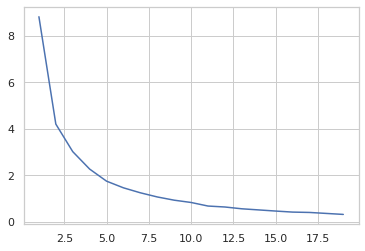

In [44]:
plt.plot(l_rng,sse)

In [45]:
k

,index,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,OVERALL_LI,FEMALE_LIT,MALE_LIT,P_SC_POP,...,SCH3P,SCH4P,SCH5P,SCH6P,SCH7P,SCH9P,SCHTOT,SCHTOTG,income,cluter
0,0,875564.0,11.33,197001.90,34.62,843.0,0.324308,54.79,77.10,0.12,...,1,0,0,35,0,0,2076,1792,0.336675,0
1,1,1015503.0,17.19,161871.18,20.34,873.0,0.324609,55.01,77.35,0.15,...,8,0,0,80,0,0,2310,1929,0.379020,1
2,2,1269751.0,98.73,155798.45,23.56,879.0,0.453369,63.47,77.95,0.09,...,35,0,0,198,0,0,985,489,0.478060,1
3,3,735753.0,11.74,150755.79,21.18,883.0,0.055355,46.60,68.56,0.05,...,9,0,0,58,0,0,1468,1229,0.373996,0
4,4,570060.0,13.80,97651.28,29.18,913.0,0.266546,53.81,75.41,0.07,...,4,0,0,71,0,0,1028,812,0.540900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,3651261.0,32.44,443263.09,27.63,862.0,0.858002,78.76,89.74,19.07,...,145,2,10,43,0,0,1181,680,0.280757,2
92,92,883418.0,17.79,100886.34,13.04,871.0,0.922684,81.92,91.06,18.66,...,34,3,12,5,4,0,343,183,0.486316,0
93,93,2240749.0,36.44,296227.02,26.73,886.0,0.802046,76.51,88.39,16.67,...,29,2,3,39,2,0,866,323,0.754084,2
94,94,1707725.0,17.91,189557.48,16.68,883.0,0.981047,84.55,92.47,16.46,...,62,5,3,13,2,0,624,308,0.345673,1


In [46]:
scaler=MinMaxScaler()
scaler.fit(k)
scaled_data=scaler.transform(k)
scaled_data

array([[0.        , 0.21090004, 0.29561573, ..., 0.70169766, 0.33667516,
        0.        ],
       [0.01052632, 0.25068315, 0.34284333, ..., 0.75707357, 0.37901981,
        0.5       ],
       [0.02105263, 0.32296304, 1.        , ..., 0.17502021, 0.47806004,
        0.5       ],
       ...,
       [0.97894737, 0.59900704, 0.49798517, ..., 0.10792239, 0.75408402,
        1.        ],
       [0.98947368, 0.44747421, 0.34864603, ..., 0.10185934, 0.3456728 ,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.29194268,
        0.        ]])

In [47]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)

pca.fit(scaled_data)

PCA(n_components=3)

In [48]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(92, 31)

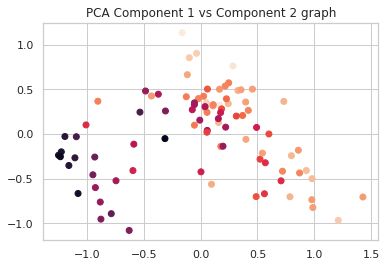

In [49]:
plt.title("PCA Component 1 vs Component 2 graph")
plt.scatter(x_pca[:,0],x_pca[:,1],c=x['OVERALL_LI'])
plt.show()